In [4]:



# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ddgclib._plotting import *
from ddgclib._sphere import *

# Incompressible Poiseuille channel fluid flow

For this test case, we will closely follow the FENICS tutorial https://fenicsproject.org/pub/tutorial/html/._ftut1009.html in order to validate our method.


The incompressible Navier-Stokes equations are:
$$
\begin{aligned}
\rho\left(\frac{\partial u}{\partial t}+u \cdot \nabla u\right) & =\nabla \cdot \sigma(u, p)+f \\
\nabla \cdot u & =0 .
\end{aligned}
$$

for a Newtonian fluid we have 
$$
\sigma(u, p)=2 \mu \epsilon(u)-p I
$$
where $\epsilon(u)$ is the strain-rate tensor
$$
\epsilon(u)=\frac{1}{2}\left(\nabla u+(\nabla u)^T\right)
$$

In standard fluid-kinetics notation: 

$$
\Delta p=\frac{8 \mu L Q}{\pi R^4}=\frac{8 \pi \mu L Q}{A^2}
$$

where:
- $\Delta p$ is the pressure difference between the two ends,
- $L$ is the length of pipe,
- $\mu$ is the dynamic viscosity,
- $Q$ is the volumetric flow rate,
- $R$ is the pipe radius,
- $A$ is the cross sectional area of pipe.

In [5]:
import numpy as np
mu = 8.90 * 1e-4  # Pa·s
L = 1  # m
Q = 1  # m3 / s
R = 1  # m
A = 1  # m2  # = 2 pi * R**2 # for pipe
# Pressure drop for pipe
dP = (8 * np.pi * mu * L * Q) / (A**2)

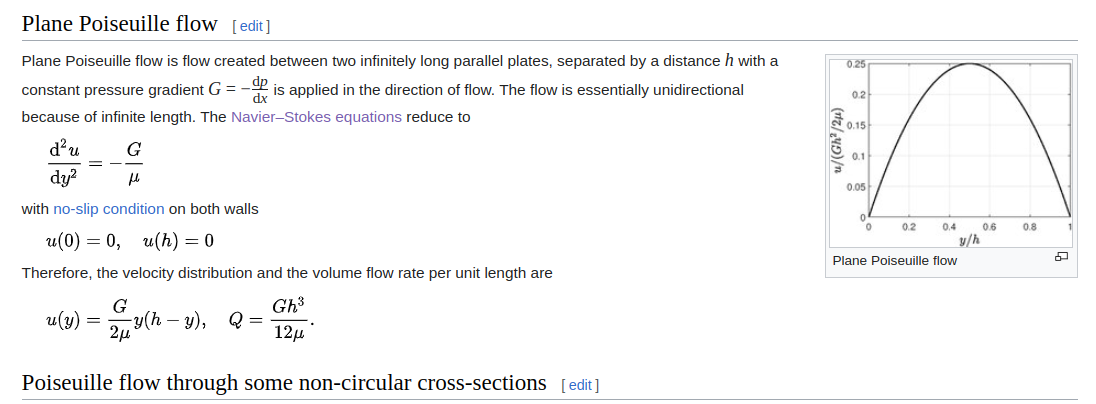

In [15]:
h = R  # m, plate seperation
Q = 1  # m/s, specify volumetric flowrate
G = (Q * 12 * mu) / (h**3)
#G = dP/ L

def u(x):
    y = x[1]
    return (G / 2 * mu) * y * (h - y)

# BC:
def u_bc(x):
    y = x[1]
    if y == 0:
        return 0.0
    elif y == h:
        return 0.0

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:3096: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if point_color is 'r':
/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:3112: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if point_color is 'r':
/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:3096: SyntaxWarning: "is" with a literal. Did you mean "==

AttributeError: <class 'ddgclib._vertex.VertexCube'> object has no attribute 'f'

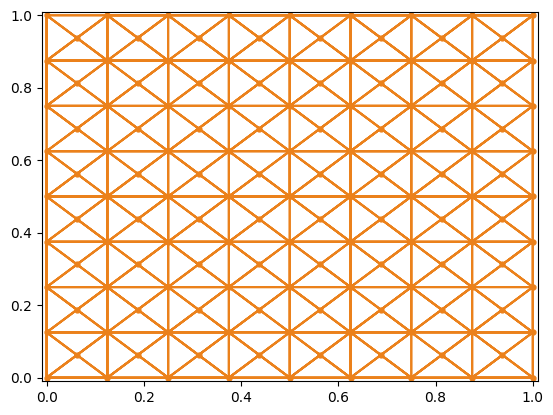

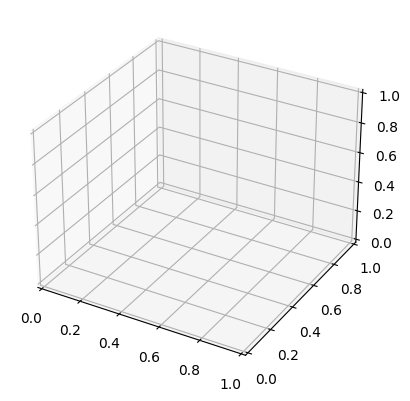

In [7]:
# Solid boundaries of plate
x_lb = 0
x_ub = 1
y_lb = 0
y_ub = 1
domain = [(x_lb, x_ub), (y_lb, y_ub)]
HC = Complex(2, domain)
HC.triangulate()
for i in range(3):
    HC.refine_all()
HC.plot_complex()

In [11]:
points = []
for v in HC.V:
    points.append(v.x_a)
points = np.array(points)
points

array([[0.    , 0.    ],
       [1.    , 1.    ],
       [1.    , 0.    ],
       [0.    , 1.    ],
       [0.5   , 0.5   ],
       [0.5   , 0.    ],
       [0.    , 0.5   ],
       [1.    , 0.5   ],
       [0.5   , 1.    ],
       [0.75  , 0.25  ],
       [0.25  , 0.75  ],
       [0.75  , 0.75  ],
       [0.25  , 0.25  ],
       [0.75  , 0.    ],
       [0.5   , 0.25  ],
       [1.    , 0.25  ],
       [0.75  , 0.5   ],
       [0.875 , 0.125 ],
       [0.625 , 0.375 ],
       [0.875 , 0.375 ],
       [0.625 , 0.125 ],
       [0.25  , 0.5   ],
       [0.    , 0.75  ],
       [0.5   , 0.75  ],
       [0.25  , 1.    ],
       [0.125 , 0.875 ],
       [0.375 , 0.625 ],
       [0.375 , 0.875 ],
       [0.125 , 0.625 ],
       [1.    , 0.75  ],
       [0.75  , 1.    ],
       [0.875 , 0.625 ],
       [0.625 , 0.625 ],
       [0.875 , 0.875 ],
       [0.625 , 0.875 ],
       [0.25  , 0.    ],
       [0.    , 0.25  ],
       [0.375 , 0.125 ],
       [0.375 , 0.375 ],
       [0.125 , 0.375 ],


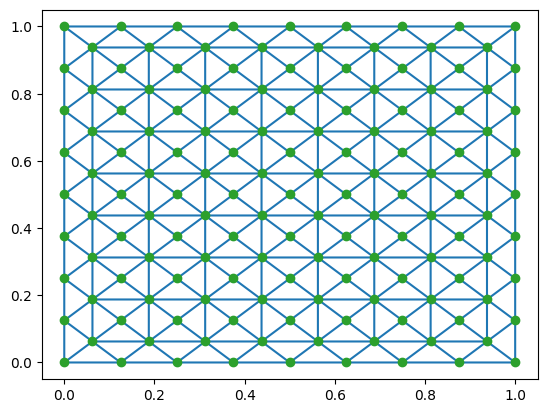

In [12]:
import numpy as np
#points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [16]:
# Assign velocity field to all points:
for v in HC.V:
    v.u = np.array([u(v.x_a), 0])

In [1]:

from scipy.fftpack import fft2, ifft2

def laplacian(Z, dx):
    Z_left = np.roll(Z, shift=-1, axis=1)
    Z_right = np.roll(Z, shift=1, axis=1)
    Z_up = np.roll(Z, shift=-1, axis=0)
    Z_down = np.roll(Z, shift=1, axis=0)
    return (Z_left + Z_right + Z_up + Z_down - 4 * Z) / dx**2

def simulate_flow(N, dt, T_end, nu, forcing):
    dx = 1 / N
    X, Y = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))
    
    omega = np.zeros((N, N))
    psi = np.zeros((N, N))
    
    T = 0
    while T < T_end:
        omega_hat = fft2(omega)
        kx, ky = np.meshgrid(np.arange(N), np.arange(N))
        laplacian_k = 2 * (np.cos(2 * np.pi * kx / N) + np.cos(2 * np.pi * ky / N) - 2)
        laplacian_k[0, 0] = 1  # Avoid division by zero
        psi_hat = -omega_hat / laplacian_k
        psi = np.real(ifft2(psi_hat))
        
        u = np.roll(psi, shift=1, axis=0) - np.roll(psi, shift=-1, axis=0)
        v = -np.roll(psi, shift=1, axis=1) + np.roll(psi, shift=-1, axis=1)
        
        omega_t = -u * laplacian(omega, dx) - v * laplacian(omega.T, dx).T + nu * laplacian(omega, dx) + forcing(X, Y, T)
        omega += dt * omega_t
        T += dt
        
    return X, Y, psi

def forcing(X, Y, T):
    F = 10 * np.sin(np.pi * X) * np.sin(np.pi * Y) * np.exp(-T / 8)
    return F

N = 128
dt = 0.001
T_end = 10
nu = 0.01

if 0:
    X, Y, psi = simulate_flow(N, dt, T_end, nu, forcing)
    u = np.roll(psi, shift=1, axis=0) - np.roll(psi, shift=-1, axis=0)
    v = -np.roll(psi, shift=1, axis=1) + np.roll(psi, shift=-1, axis=1)

    plt.figure(figsize=(8, 8))
    plt.streamplot(X, Y, u, v, density=2)
    plt.show()


In [ ]:
domain = p[]

The exact solution is derived by assuming $u=\left(u_x(x, y, z), 0,0\right)$, with the $x$ axis pointing along the channel. Since $\nabla \cdot u=0$, $u$ cannot depend on $x$. The physics of channel flow is also two-dimensional so we can omit the $z$ coordinate (more precisely: $\partial / \partial z=0$ ). Inserting $u=\left(u_x, 0,0\right)$ in the (scaled) governing equations gives $u_x^{\prime \prime}(y)=\partial p / \partial x$. Differentiating this equation with respect to $x$ shows that $\partial^2 p / \partial^2 x=0$ so $\partial p / \partial x$ is a constant, here called $-\beta$. This is the driving force of the flow and can be specified as a known parameter in the problem. Integrating $u_x^{\prime \prime}(y)=-\beta$ over the width of the channel, $[0,1]$, and requiring $u=(0,0,0)$ at the channel walls, results in $u_x=\frac{1}{2} \beta y(1-y)$. The characteristic inlet velocity $U$ can be taken as the maximum inflow at $y=1 / 2$, implying $\beta=8$. The length of the channel, $L / H$ in the scaled model, has no impact on the result, so for simplicity we just compute on the unit square. Mathematically, the pressure must be prescribed at a point, but since $p$ does not depend on $y$, we can set $p$ to a known value, e.g. zero, along the outlet boundary $x=1$. The result is $p(x)=8(1-x)$ and $u_x=4 y(1-y)$.

The boundary conditions can be set as $p=8$ at $x=0, p=0$ at $x=1$ and $u=(0,0,0)$ on the walls $y=0,1$. This defines the pressure drop and should result in unit maximum velocity at the inlet and outlet and a parabolic velocity profile without further specifications. Note that it is only meaningful to solve the Navier-Stokes equations in 2D or 3D geometries, although the underlying mathematical problem collapses to two 1D problems, one for $u_x(y)$ and one for $p(x)$.

In [ ]:
#Analytical
U_char = 0.  # at y= 1/2
def u_x_analytical(y):
    return 4 * y * (1 - y)

In [ ]:
# Define an initial velocity field using 


In [26]:
"""
FEniCS tutorial demo program: Incompressible Navier-Stokes equations
for channel flow (Poisseuille) on the unit square using the
Incremental Pressure Correction Scheme (IPCS).

  u' + u . nabla(u)) - div(sigma(u, p)) = f
                                 div(u) = 0
"""

from __future__ import print_function
from fenics import *
import numpy as np

T = 10.0           # final time
num_steps = 500    # number of time steps
dt = T / num_steps # time step size
mu = 1             # kinematic viscosity
rho = 1            # density

# Create mesh and define function spaces
mesh = UnitSquareMesh(16, 16)
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)

# Define boundaries
inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 1)'
walls   = 'near(x[1], 0) || near(x[1], 1)'

# Define boundary conditions
bcu_noslip  = DirichletBC(V, Constant((0, 0)), walls)
bcp_inflow  = DirichletBC(Q, Constant(8), inflow)
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu = [bcu_noslip]
bcp = [bcp_inflow, bcp_outflow]

# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

# Define functions for solutions at previous and current time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

# Define expressions used in variational forms
U   = 0.5*(u_n + u)
n   = FacetNormal(mesh)
f   = Constant((0, 0))
k   = Constant(dt)
mu  = Constant(mu)
rho = Constant(rho)

# Define strain-rate tensor
def epsilon(u):
    return sym(nabla_grad(u))

# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx + \
     rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx \
   + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

# Define variational problem for step 3
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

# Time-stepping
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Step 1: Tentative velocity step
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    solve(A1, u_.vector(), b1)

    # Step 2: Pressure correction step
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    solve(A2, p_.vector(), b2)

    # Step 3: Velocity correction step
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3)

    # Plot solution
    plot(u_)

    # Compute error
    u_e = Expression(('4*x[1]*(1.0 - x[1])', '0'), degree=2)
    u_e = interpolate(u_e, V)
    error = np.abs(u_e.vector().array() - u_.vector().array()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    print('max u:', u_.vector().array().max())

    # Update previous solution
    u_n.assign(u_)
    p_n.assign(p_)

# Hold plot
interactive()


ModuleNotFoundError: No module named 'fenics'